In [1]:
import copy
import scipy
import numpy as np
import matplotlib.pyplot as plt

from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import reverse_cuthill_mckee

print(scipy.version.full_version)

1.4.1


In [2]:
well_nums = [1, 2, 3, 4, 5, 6, 19, 20, 21, 22, 23, 24, 49, 50, 51, 52, 53, 54, 67, 68, 69, 70, 71, 72]

densities = [500, 500, 500, 1000, 1000, 1000, 
             1000, 1000, 1000, 500, 500, 500,
             500, 500, 500, 1000, 1000, 1000,
             1000, 1000, 1000, 500, 500, 500]

conditions = ["GM", "Gefitinib", "Assay", "GM", "Gefitinib", "Assay",
             "Assay", "Gefitinib", "GM", "Assay", "Gefitinib", "GM",
             "GM", "Gefitinib", "Assay", "GM", "Gefitinib", "Assay",
             "Assay", "Gefitinib", "GM", "Assay", "Gefitinib", "GM"]

In [3]:
pairwise_wass_matrix = np.load("Exp_Wasserstein_Pairwise.npy")

In [4]:
pairwise_wass_mat = copy.deepcopy(pairwise_wass_matrix)

In [5]:
permut_arr = [16, 0, 11, 22, 10, 17, 4, 7, 3, 8, 15, 20, 19, 12, 23, 1, 14, 21, 13, 5, 6, 9, 2, 18]

In [6]:
row_swapped = pairwise_wass_mat[permut_arr, :]
swapped = row_swapped[:, permut_arr]

In [7]:
well_names_alt = []
for cnt in range(len(conditions)):
    well_string = ""
    if well_nums[permut_arr[cnt]] < 25:
        well_string = "DMSO, "
    else:
        well_string = "OHT, "
    well_string = well_string + conditions[permut_arr[cnt]] + ", " + repr(densities[permut_arr[cnt]]) + " cells (Well " + repr(well_nums[permut_arr[cnt]]) + ")"
    well_names_alt.append(well_string)

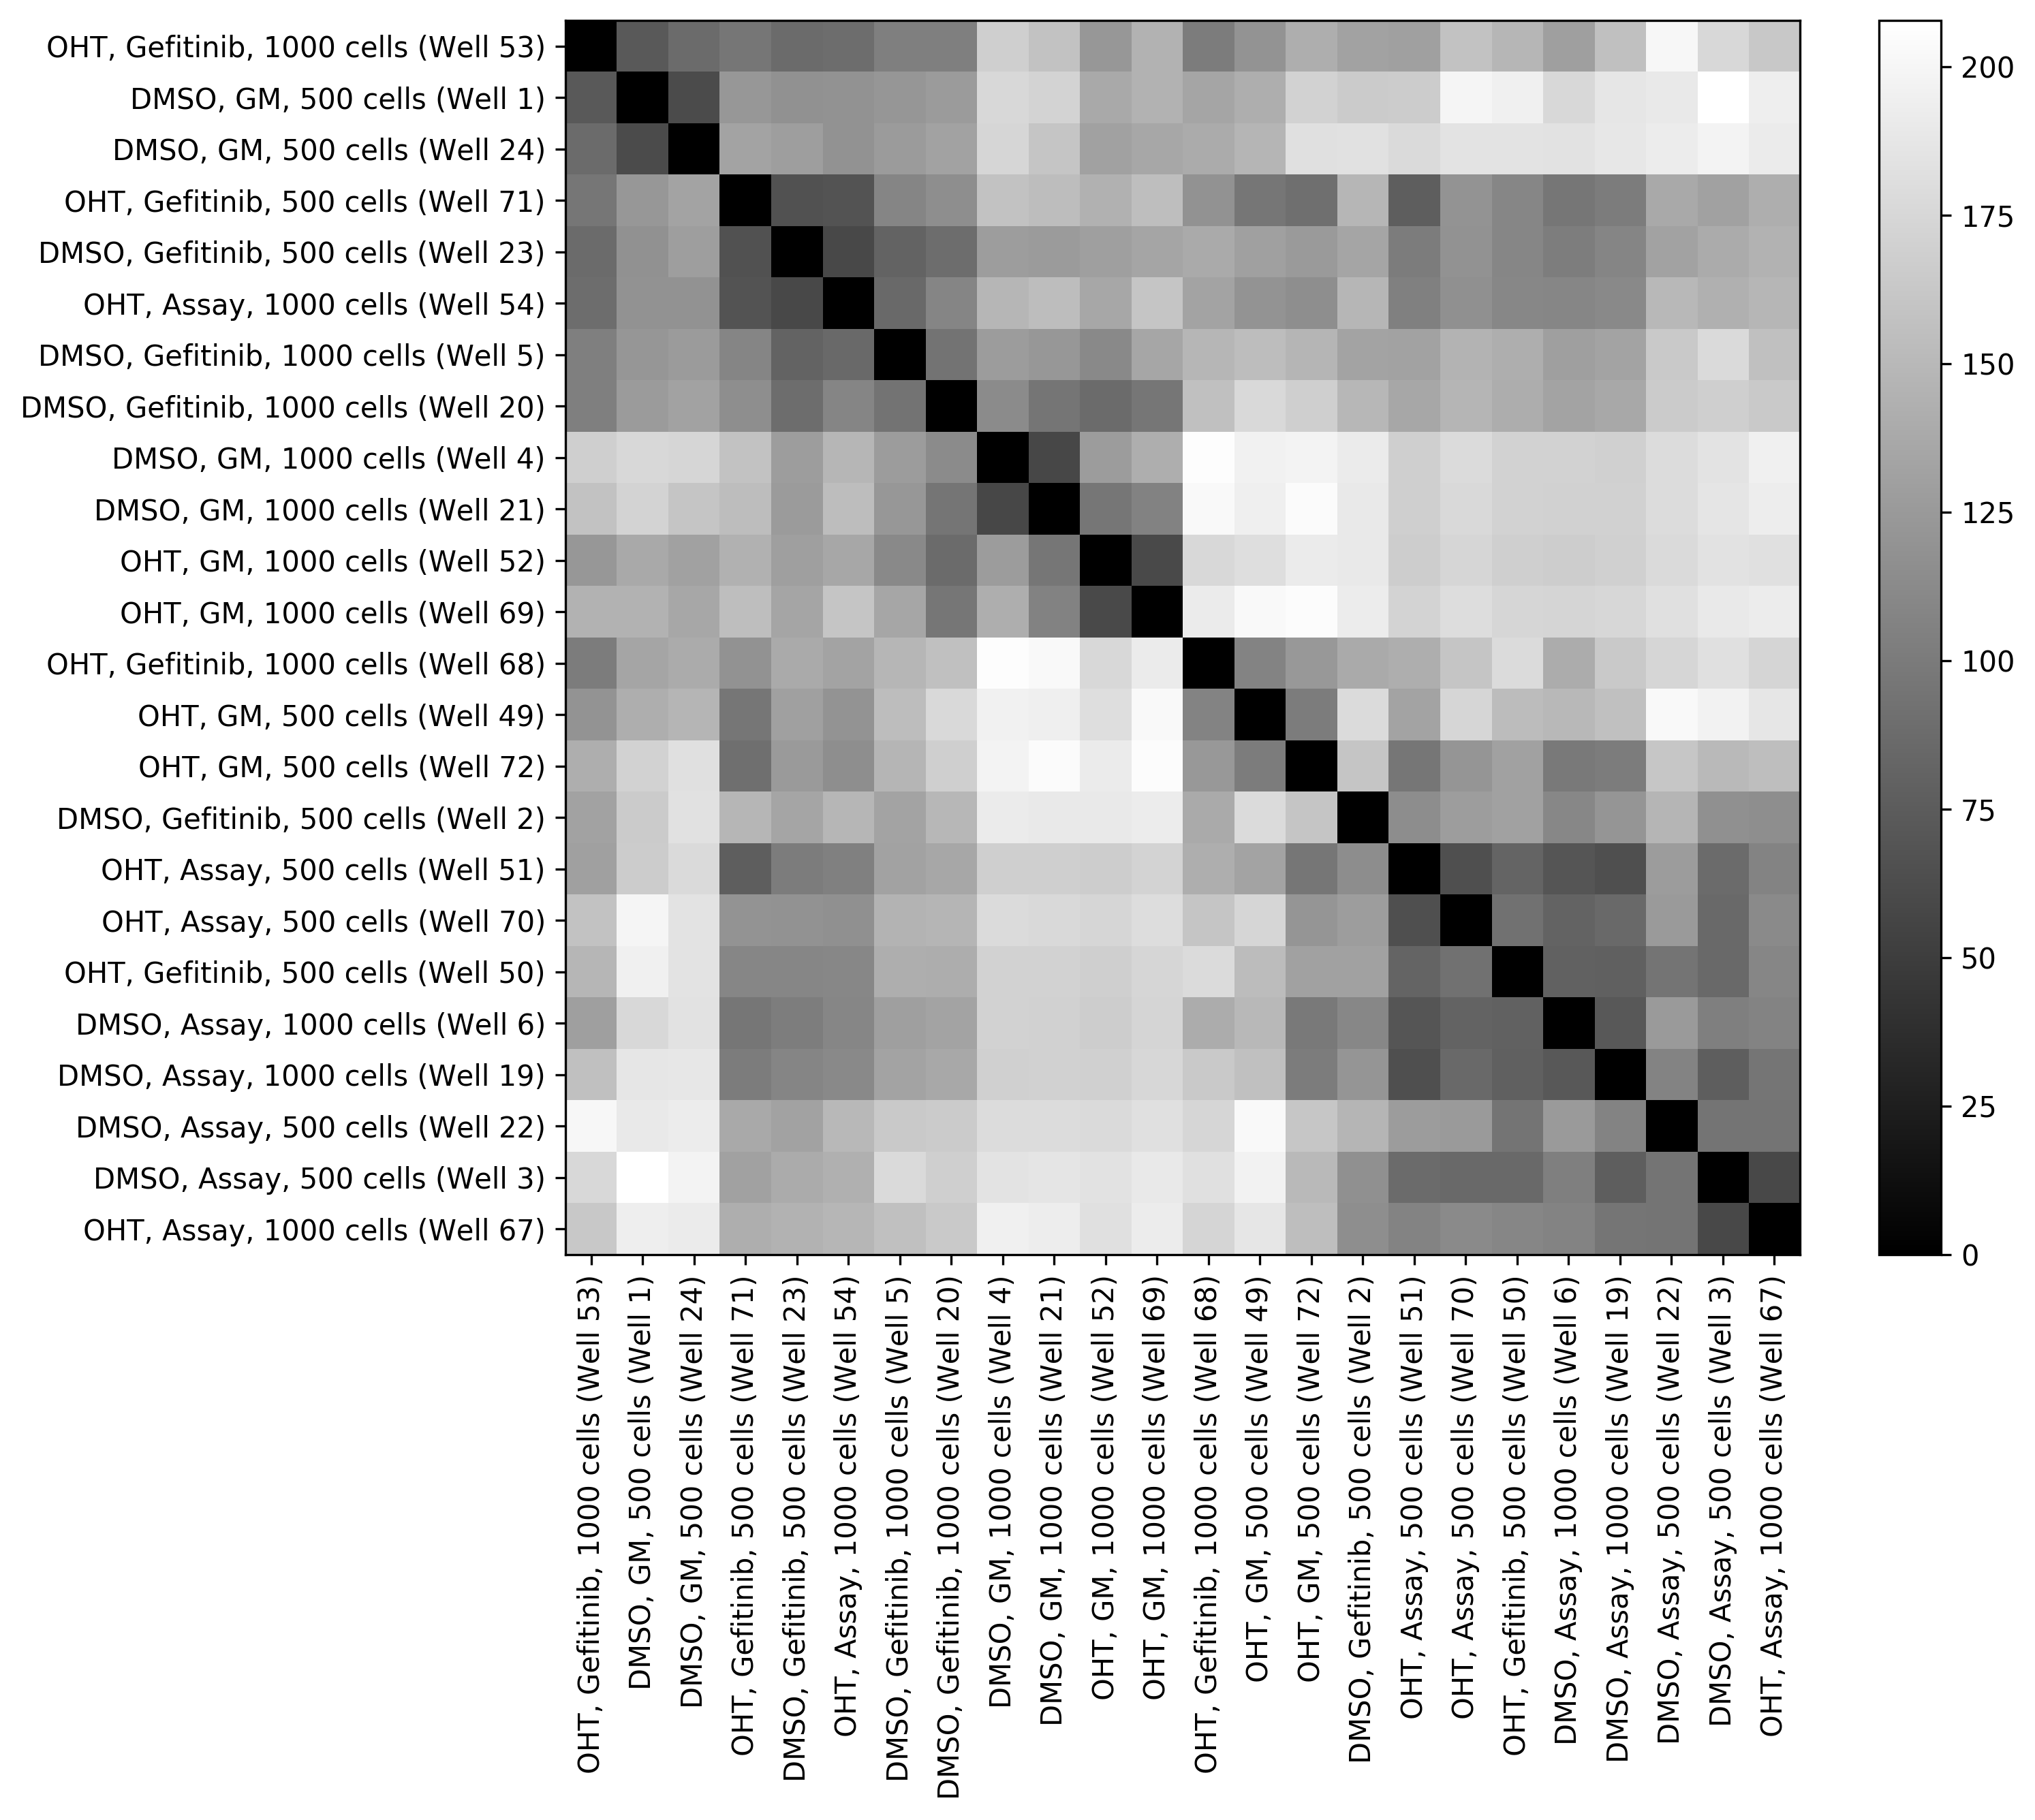

In [8]:
plt.figure(figsize=(10,8), dpi=300);
plt.imshow(swapped, cmap="gray", interpolation="none");
plt.xticks(range(24), well_names_alt, rotation=90);
plt.yticks(range(24), well_names_alt);
plt.colorbar();

#### Remove Gefitinib condition

In [9]:
num_deletions = 0
for cnt in range(len(conditions)):
    if conditions[cnt] == "Gefitinib":
        pairwise_wass_matrix = np.delete(pairwise_wass_matrix, cnt-num_deletions, 0)
        pairwise_wass_matrix = np.delete(pairwise_wass_matrix, cnt-num_deletions, 1)
        num_deletions += 1

In [10]:
print(np.shape(pairwise_wass_matrix))

(16, 16)


In [11]:
well_names = []
for cnt in range(len(conditions)):
    if conditions[cnt] == "Gefitinib":
        continue
    well_string = ""
    if well_nums[cnt] < 25:
        well_string = "DMSO, "
    else:
        well_string = "OHT, "
    well_string = well_string + conditions[cnt] + ", " + repr(densities[cnt]) + " cells (Well " + repr(well_nums[cnt]) + ")"
    well_names.append(well_string)

In [12]:
len(well_names)

16

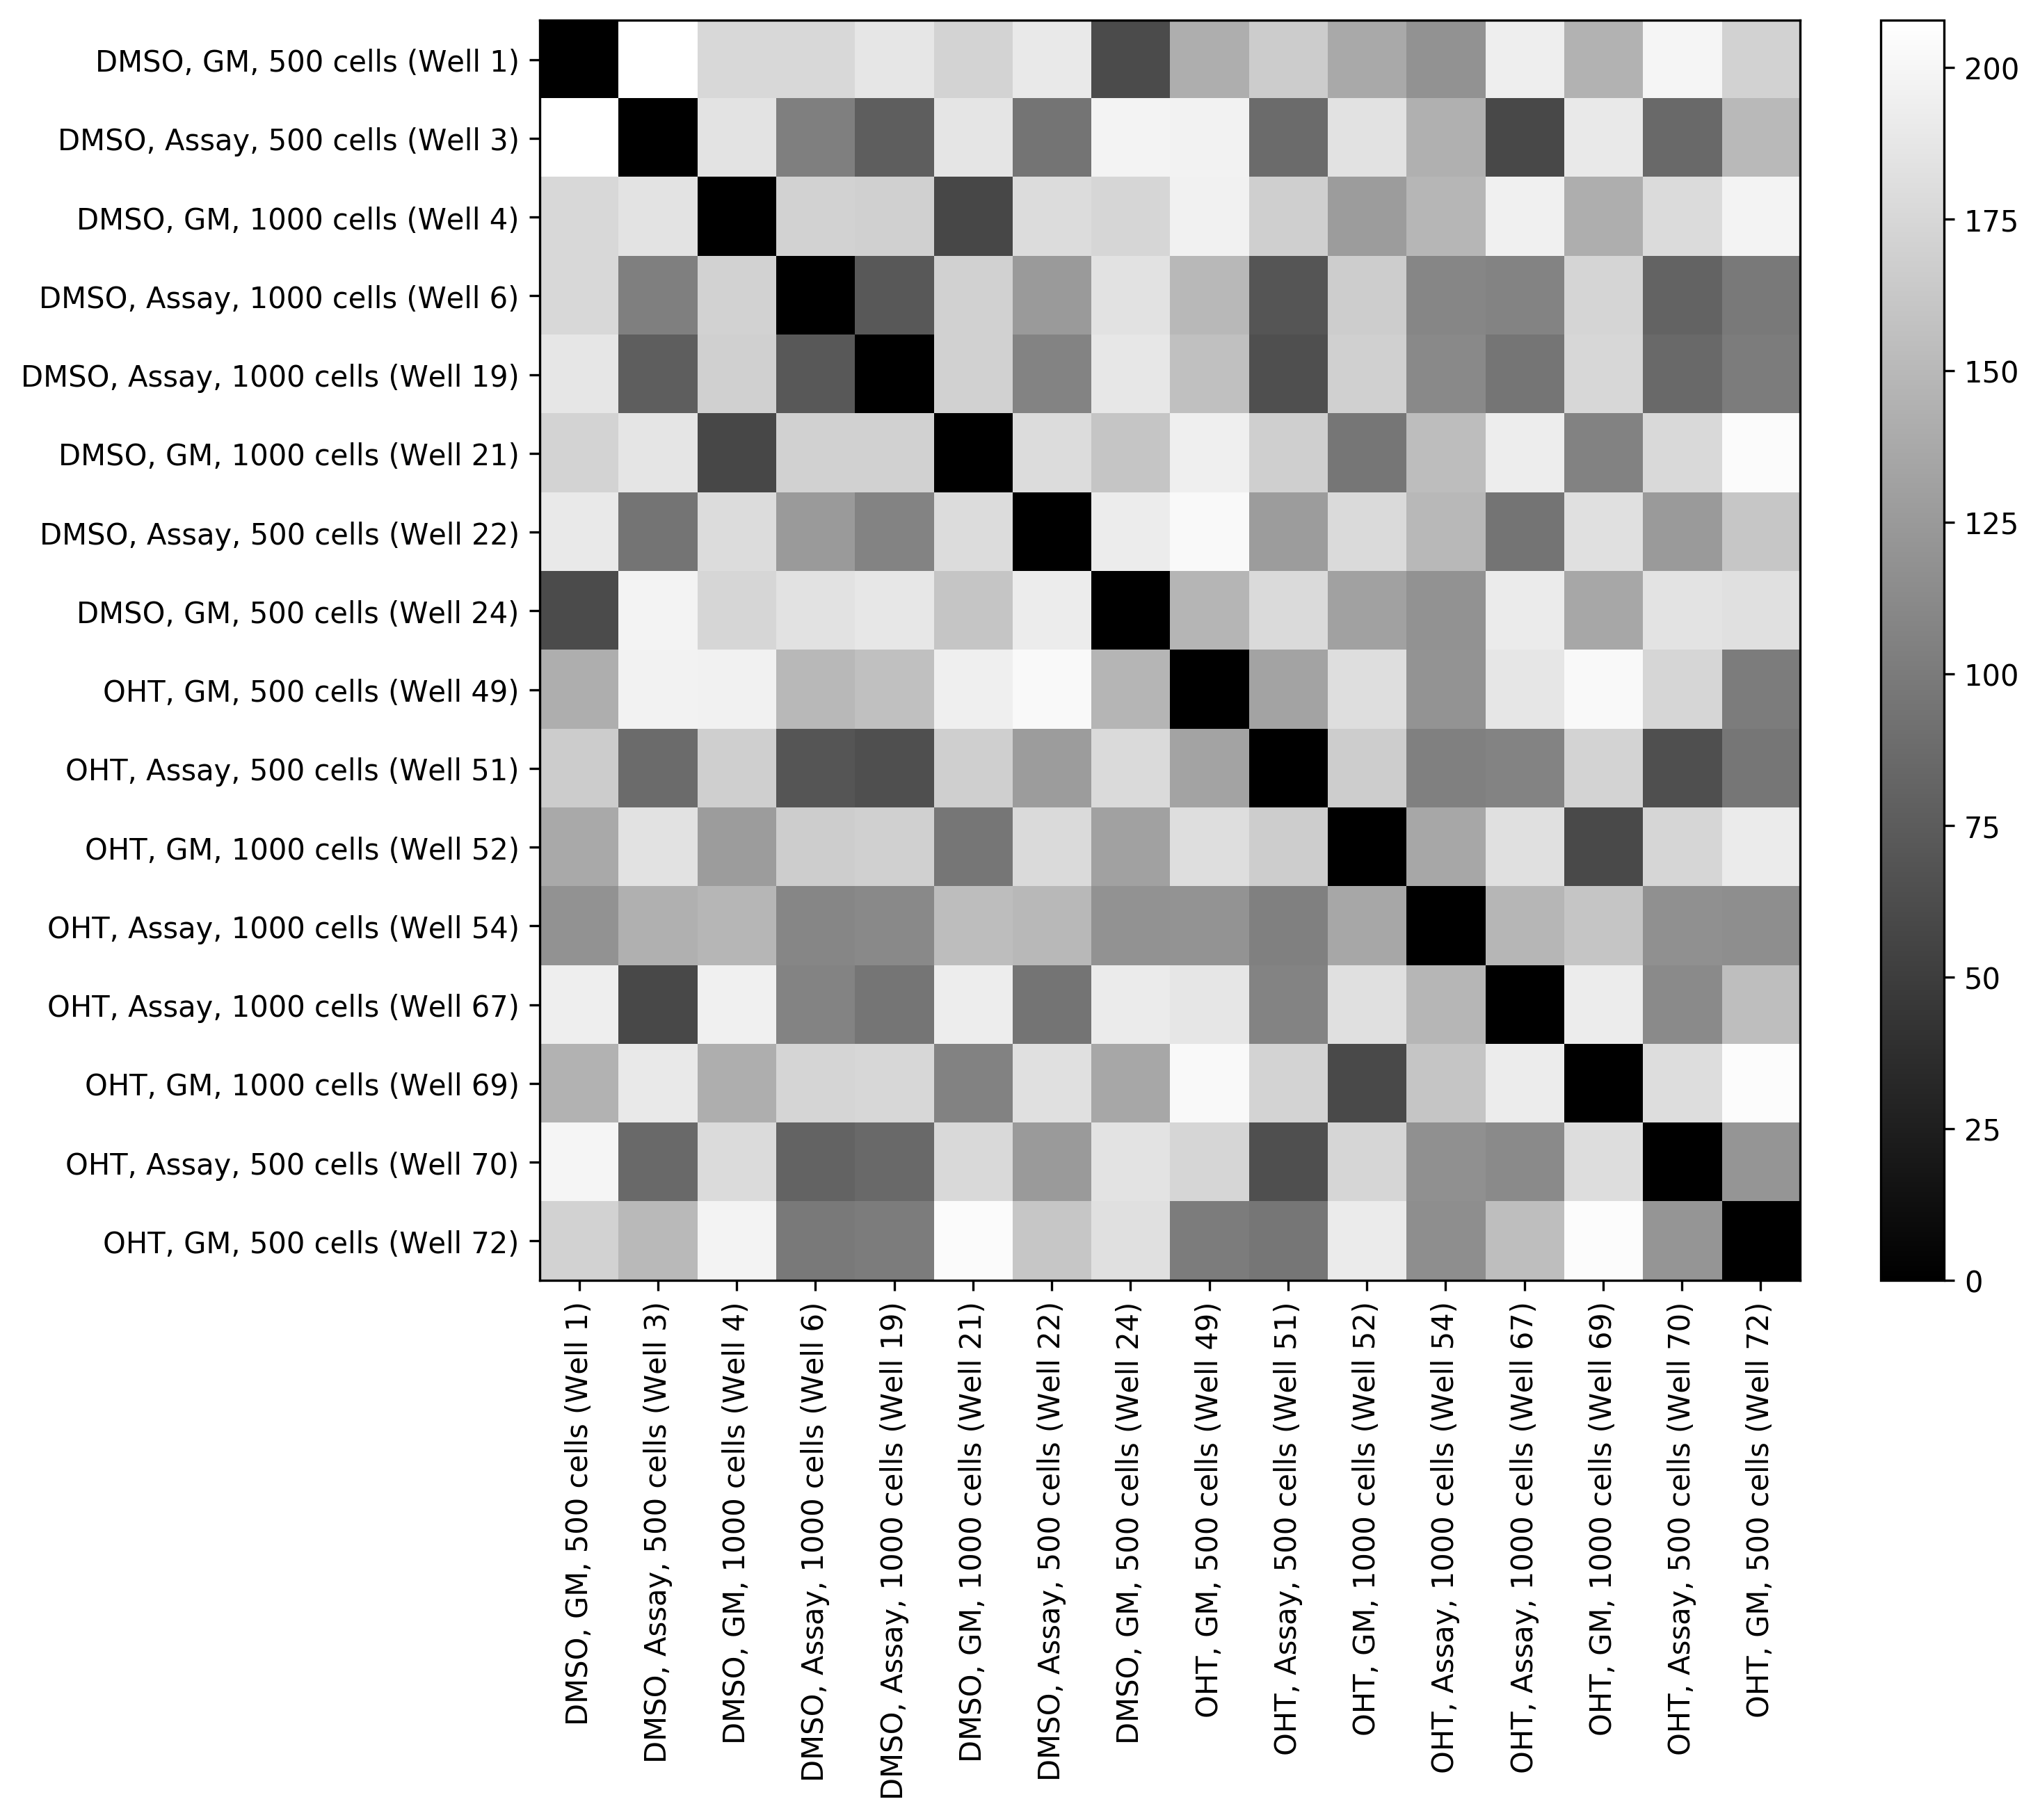

In [13]:
plt.figure(figsize=(10,8), dpi=300);
plt.imshow(pairwise_wass_matrix, cmap="gray", interpolation="none");
plt.xticks(range(16), well_names, rotation=90);
plt.yticks(range(16), well_names);
plt.colorbar();

In [14]:
np.save("Exp_Wasserstein_Pairwise_Sml.npy", pairwise_wass_matrix)

In [15]:
permut_arr = reverse_cuthill_mckee(csr_matrix(1 - pairwise_wass_matrix/np.max(pairwise_wass_matrix)), True)

In [16]:
permut_arr

array([ 1, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  0],
      dtype=int32)

In [17]:
well_names

['DMSO, GM, 500 cells (Well 1)',
 'DMSO, Assay, 500 cells (Well 3)',
 'DMSO, GM, 1000 cells (Well 4)',
 'DMSO, Assay, 1000 cells (Well 6)',
 'DMSO, Assay, 1000 cells (Well 19)',
 'DMSO, GM, 1000 cells (Well 21)',
 'DMSO, Assay, 500 cells (Well 22)',
 'DMSO, GM, 500 cells (Well 24)',
 'OHT, GM, 500 cells (Well 49)',
 'OHT, Assay, 500 cells (Well 51)',
 'OHT, GM, 1000 cells (Well 52)',
 'OHT, Assay, 1000 cells (Well 54)',
 'OHT, Assay, 1000 cells (Well 67)',
 'OHT, GM, 1000 cells (Well 69)',
 'OHT, Assay, 500 cells (Well 70)',
 'OHT, GM, 500 cells (Well 72)']

In [18]:
# obtained from R
permut_arr = [0, 7, 2, 5, 10, 13, 8, 15, 6, 1, 12, 11, 9, 14, 3, 4]

In [19]:
new_well_names = []
for i in range(len(well_names)):
    new_well_names.append(well_names[permut_arr[i]])

In [20]:
new_well_names

['DMSO, GM, 500 cells (Well 1)',
 'DMSO, GM, 500 cells (Well 24)',
 'DMSO, GM, 1000 cells (Well 4)',
 'DMSO, GM, 1000 cells (Well 21)',
 'OHT, GM, 1000 cells (Well 52)',
 'OHT, GM, 1000 cells (Well 69)',
 'OHT, GM, 500 cells (Well 49)',
 'OHT, GM, 500 cells (Well 72)',
 'DMSO, Assay, 500 cells (Well 22)',
 'DMSO, Assay, 500 cells (Well 3)',
 'OHT, Assay, 1000 cells (Well 67)',
 'OHT, Assay, 1000 cells (Well 54)',
 'OHT, Assay, 500 cells (Well 51)',
 'OHT, Assay, 500 cells (Well 70)',
 'DMSO, Assay, 1000 cells (Well 6)',
 'DMSO, Assay, 1000 cells (Well 19)']

In [21]:
row_swapped = pairwise_wass_matrix[permut_arr, :]
swapped = row_swapped[:, permut_arr]

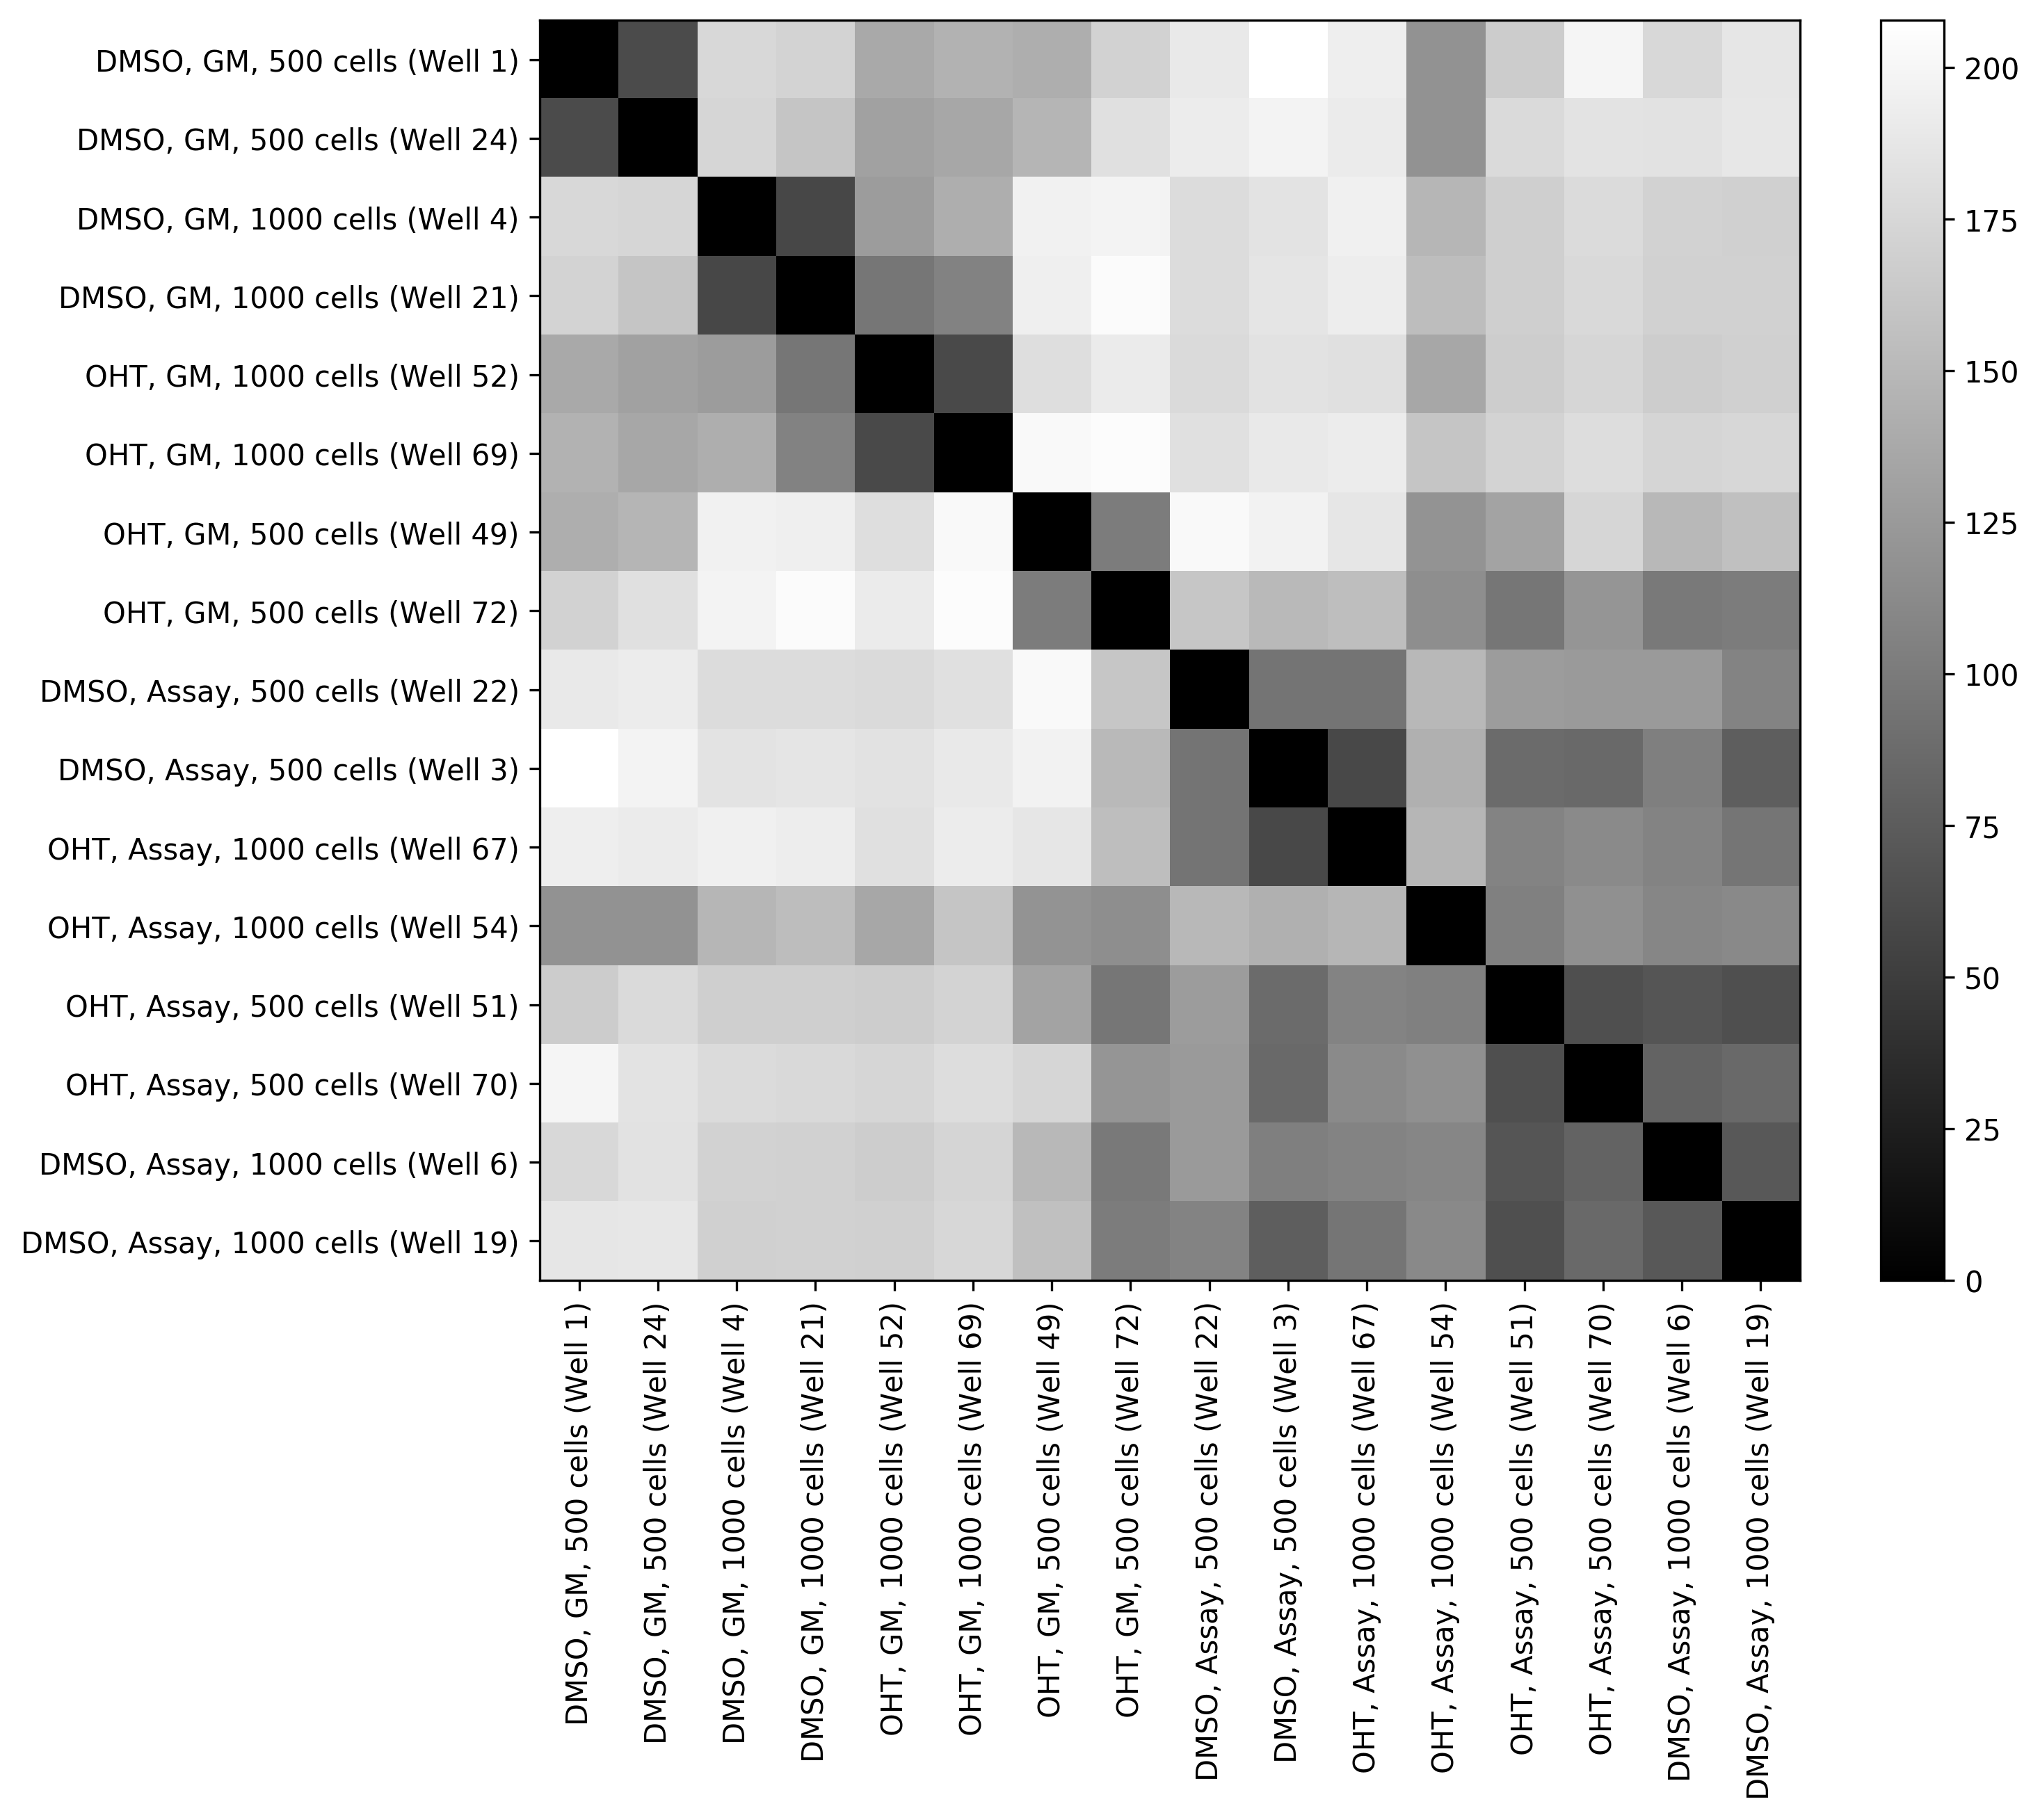

In [22]:
plt.figure(figsize=(10,8), dpi=300);
plt.imshow(swapped, cmap="gray", interpolation="none");
plt.xticks(range(16), new_well_names, rotation=90);
plt.yticks(range(16), new_well_names);
plt.colorbar();